# Reconhecimento e Análise facial com DeepFace


Você deve criar um Analisador Automático de Fotos

**Contexto:** <br>
Você foi contratado para desenvolver uma ferramenta inteligente de "Análise de Fotos" para uma empresa. O objetivo é que a ferramenta receba uma foto e gere automaticamente um relatório visual sobre cada pessoa na imagem: sua emoção predominante, idade estimada, gênero e etnia.

<br>

**Objetivos de Aprendizagem:**

- Utilizar uma biblioteca de alto nível (deepface) para realizar análise facial complexa com poucas linhas de código.

- Aplicar a função de detecção e análise para extrair múltiplos atributos de um rosto.

- Integrar os resultados da análise com as funções de desenho do OpenCV para criar uma visualização de dados rica e informativa.

- Compreender como frameworks modernos de Deep Learning podem simplificar tarefas avançadas de Visão Computacional.

<br>

**O que é o DeepFace:**

O DeepFace é uma biblioteca de Python de código aberto voltada para reconhecimento e análise facial, que funciona como uma camada de alto nível sobre diferentes modelos de redes neurais convolucionais já treinados. Com ela, é possível de forma simples e prática realizar tarefas como verificação de identidade (comparar se duas fotos são da mesma pessoa) e análise de atributos faciais, incluindo estimativa de idade, gênero, emoções e raça/etnia, sem necessidade de treinar modelos do zero. Essa facilidade de uso faz com que o DeepFace seja muito utilizado em aplicações, tornando-se uma ferramenta poderosa para explorar o potencial da visão computacional aplicada a rostos.

<br>

---

ORIENTAÇÕES:

---



# Etapa 01 - Configuração do ambiente - Importação das bibliotecas #

In [14]:
!pip install -q deepface opencv-python matplotlib

#Importação das bibliotecas
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

# Etapa 02 - Carregamento da imagem #

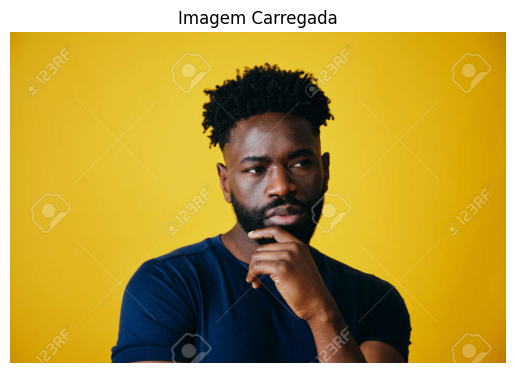

In [15]:
#1. Importar uma foto para o google colab
caminho_imagem = "/content/minhaFoto.jpg"

#2. Carregar a imagem
imagem_bgr = cv2.imread(caminho_imagem)

#3. Converter a imagem para tons (visualizar corretamente a imagem)
imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

#4. Visualização da imagem
plt.imshow(imagem_rgb)
plt.title("Imagem Carregada")
plt.axis('off')
plt.show()


# Etape 3 - Análise Facial com DeepFace

In [16]:
resultado = DeepFace.analyze(
    img_path=imagem_rgb,              # Caminho ou imagem carregada
    actions=['age','gender','emotion','race'],  # Lista de análises desejadas: idade, gênero, emoção e raça/etnia
    detector_backend='opencv',        # Define o algoritmo usado para detectar o rosto
    enforce_detection=False           # Se False, continua mesmo se o rosto não for detectado claramente
)


# O DeepFace pode trazer dois formatos de resultado:
# - Dicionário: quando só existe UM rosto na imagem
# - Lista de dicionários: quando existem VÁRIOS rostos na imagem
# Neste caso, escolhemos apenas o primeiro rosto detectado

if isinstance(resultado, list) and len(resultado) > 0:
    resultado = resultado[0]  # pega apenas o primeiro rosto da lista

Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]


# Etapa 4 - Exibir os resultados

In [17]:
 # Pega a idade estimada; se não encontrar, mostra "desconhecida"
idade = resultado.get('age', 'desconhecida')

# Pega o gênero dominante (o DeepFace já escolhe o mais provável)
genero = resultado.get('dominant_gender', None)

# Pega a emoção dominante (feliz, triste, bravo, etc.); se não achar, mostra "desconhecida"
emocao_principal = resultado.get('dominant_emotion', 'desconhecida')

# Pega a raça/etnia dominante; se não achar, mostra "desconhecida"
raca_principal = resultado.get('dominant_race', 'desconhecida')


print("\n\n === Resultados da Análise Facial ===")
print(f"Idade (estimada): {idade}")
print(f"Gênero (estimado): {genero}")
print(f"Emoção principal: {emocao_principal}")
print(f"Raça/etnia principal (estimada): {raca_principal}")




 === Resultados da Análise Facial ===
Idade (estimada): 26
Gênero (estimado): Man
Emoção principal: neutral
Raça/etnia principal (estimada): black


# Etapa 5 - Desenhando um retângulo no rosto detectado

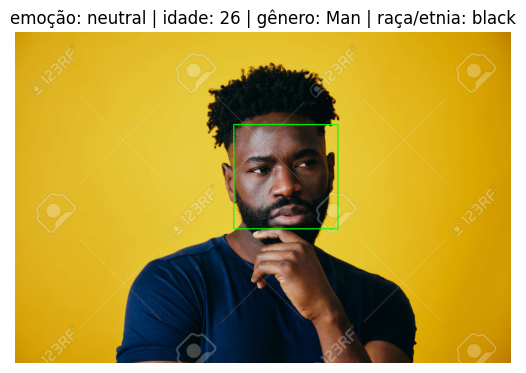

In [19]:
# Pega a região do rosto detectado (coordenadas da caixa delimitadora)
regiao = resultado.get('region', None)

# Faz uma cópia da imagem original (para não desenhar em cima dela)
imagem_com_caixa = imagem_rgb.copy()

# Verifica se a região existe
if regiao is not None:
    # Verifica se todas as chaves necessárias estão presentes
    if 'x' in regiao and 'y' in regiao and 'w' in regiao and 'h' in regiao:

        # Renomeia variáveis para ficar mais claro
        x_inicial = regiao['x']   # posição horizontal (coluna inicial do rosto)
        y_inicial = regiao['y']   # posição vertical (linha inicial do rosto)
        largura   = regiao['w']   # largura da caixa
        altura    = regiao['h']   # altura da caixa

        # Desenha um retângulo verde ao redor do rosto detectado
        imagem_com_caixa = cv2.rectangle(
            imagem_com_caixa,
            (x_inicial, y_inicial),                    # canto superior esquerdo
            (x_inicial + largura, y_inicial + altura), # canto inferior direito
            (0, 255, 0), 2                             # cor (verde) e espessura da linha
        )

# Monta o título com os resultados principais da análise
titulo = f"emoção: {emocao_principal} | idade: {idade} | gênero: {genero} | raça/etnia: {raca_principal}"

# Mostra a imagem final com a caixa e o título
plt.imshow(imagem_com_caixa)
plt.title(titulo)
plt.axis("off")
plt.show()